# 1. Introduction : This exercise is to analyze employee data. Consider which features affect the employee's attrition (resign or not resign)

In [1]:
import pandas as pd

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# 2. Describing data set 

In [4]:
data.shape

(1470, 35)

<h1>There are 1407 rows and 35 columns. This sample is large enough for testing.</h1>

In [5]:
data.head

<bound method NDFrame.head of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
10     35        No      Travel_Rarely        809  Research & Development   
11     29        No      Travel_Rarely        

In [6]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# There is no missing or illogical value in the data set.

In [8]:
data['Attrition'].head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [9]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [10]:
data_att = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [11]:
data_att.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [12]:
data_att.describe()

count    1470.000000
mean        0.161224
std         0.367863
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Attrition, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

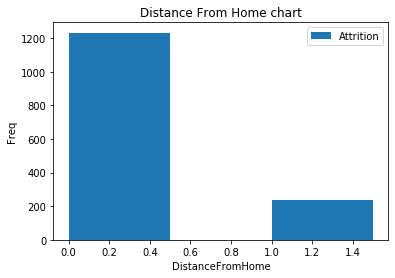

In [13]:
bins_att = np.arange(start=0, stop=2, step=0.5)
plt.hist(data_att, bins = bins_att,label=['Attrition'])
plt.title('Distance From Home chart')
plt.xlabel("DistanceFromHome")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

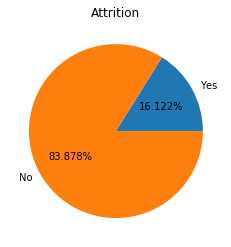

In [14]:
sizes_attrition = [data_att.value_counts()[1], data_att.value_counts()[0]]
plt.pie(sizes_attrition, labels=['Yes', 'No'], autopct='%.3f%%')
plt.title('Attrition')
plt.show

# 3. What are key factors that are playing into current attrition rates?

# 3.1. Distance from home :

In [15]:
data['DistanceFromHome'].head()

0    1
1    8
2    2
3    3
4    2
Name: DistanceFromHome, dtype: int64

In [16]:
data['DistanceFromHome'].value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
12     20
17     20
13     19
22     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

In [17]:
data['DistanceFromHome'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

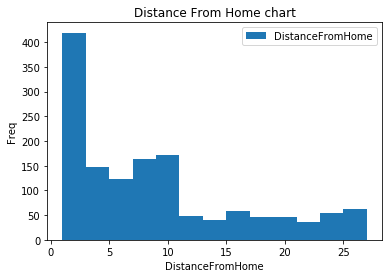

In [18]:
bins_distance = np.arange(start=1, stop=29, step=2)
plt.hist(data['DistanceFromHome'], bins = bins_distance,label=['DistanceFromHome'])
plt.title('Distance From Home chart')
plt.xlabel("DistanceFromHome")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

In [19]:
data_f1_attrition1=data[data['Attrition']=='Yes']['DistanceFromHome']

<function matplotlib.pyplot.show(*args, **kw)>

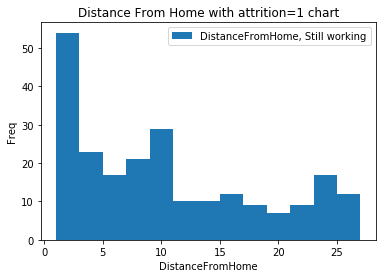

In [20]:
bins_distance = np.arange(start=1, stop=29, step=2)
plt.hist(data_f1_attrition1, bins = bins_distance, label=['DistanceFromHome, Still working'])
plt.title('Distance From Home with attrition=1 chart')
plt.xlabel("DistanceFromHome")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

In [21]:
data_f1_attrition0=data[data['Attrition']=="No"]['DistanceFromHome']

<function matplotlib.pyplot.show(*args, **kw)>

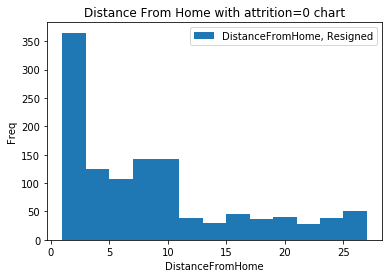

In [22]:
bins_distance = np.arange(start=1, stop=29, step=2)
plt.hist(data_f1_attrition0, bins = bins_distance,label=['DistanceFromHome, Resigned'])
plt.title('Distance From Home with attrition=0 chart')
plt.xlabel("DistanceFromHome")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

# Hypothesis : The distance from home will impact the attrition rate.

<p><strong>H0</strong> : The distance from home don't impact the attrition rate </p>
<strong>H1</strong> : The distance from home impact the attrition rate.

In [23]:
stats.ttest_1samp(data_f1_attrition1, data['DistanceFromHome'].mean())

Ttest_1sampResult(statistic=2.6234277922535685, pvalue=0.009272331622219679)

In [24]:
print("T-critical value:", stats.t.ppf(1-(0.05/2), len(data_f1_attrition1)-1))

T-critical value: 1.970066853101121


<B>We can see T-statistic > T-critical (2.6234277922535685 > 1.970066853101121). So we reject H0. The Distance from Home will impact the attrition rate. T-stattic is positive. So the higher employees have attrition rate, the farer they go to work.

# 3.2 Total Working Years :

In [25]:
data['TotalWorkingYears'].head()

0     8
1    10
2     7
3     8
4     6
Name: TotalWorkingYears, dtype: int64

In [26]:
data['TotalWorkingYears'].value_counts()

10    202
6     125
8     103
9      96
5      88
1      81
7      81
4      63
12     48
3      42
15     40
16     37
13     36
11     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
27      7
30      7
33      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

In [27]:
data['TotalWorkingYears'].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

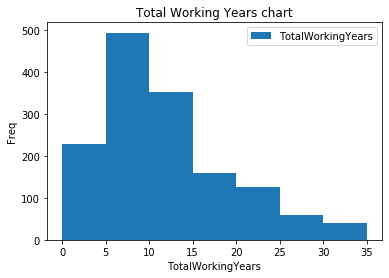

In [28]:
bins_distance = np.arange(start=0, stop=40, step=5)
plt.hist(data['TotalWorkingYears'], bins = bins_distance,label=['TotalWorkingYears'])
plt.title('Total Working Years chart')
plt.xlabel("TotalWorkingYears")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

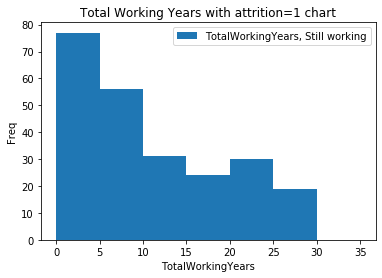

In [29]:
data_f2_attrition1=data[data['Attrition']=='Yes']['TotalWorkingYears']
bins_distance = np.arange(start=0, stop=40, step=5)
plt.hist(data_f1_attrition1, bins = bins_distance, label=['TotalWorkingYears, Still working'])
plt.title('Total Working Years with attrition=1 chart')
plt.xlabel("TotalWorkingYears")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

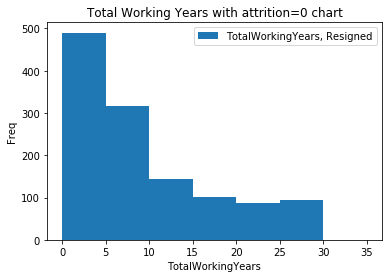

In [30]:
data_f2_attrition0=data[data['Attrition']=="No"]['TotalWorkingYears']
bins_distance = np.arange(start=0, stop=40, step=5)
plt.hist(data_f1_attrition0, bins = bins_distance,label=['TotalWorkingYears, Resigned'])
plt.title('Total Working Years with attrition=0 chart')
plt.xlabel("TotalWorkingYears")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

# Hypothesis : The total working years will impact the attrition rate.

<p><strong>H0</strong> : The total working years don't impact the attrition rate </p>
<strong>H1</strong> : The total working years impact the attrition rate.

In [31]:
stats.ttest_1samp(data_f2_attrition1, data['TotalWorkingYears'].mean())

Ttest_1sampResult(statistic=-6.516925900360393, pvalue=4.2999495770726643e-10)

In [32]:
print("T-critical value:", stats.t.ppf(1-(0.05/2), len(data_f2_attrition1)-1))

T-critical value: 1.970066853101121


<B>We can see |T-statistic| > |T-critical| (6.516925900360393 > 1.970066853101121). 
So we reject H0. The total working year will impact the attrition rate. T-stattic is negative. So the higher employees have attrition rate, the shorter year they work in the industry.

# 3.3. Monthly Income :

In [33]:
data['MonthlyIncome'].head()

0    5993
1    5130
2    2090
3    2909
4    3468
Name: MonthlyIncome, dtype: int64

In [34]:
data['MonthlyIncome'].value_counts()

2342     4
5562     3
2741     3
2451     3
2610     3
2380     3
6142     3
6347     3
2559     3
2404     3
3452     3
5769     2
3420     2
6397     2
4306     2
2743     2
3760     2
2720     2
4779     2
4284     2
5238     2
5228     2
2269     2
2996     2
9980     2
2782     2
5204     2
5993     2
4197     2
7756     2
        ..
3743     1
13582    1
7457     1
13603    1
11557    1
1081     1
5415     1
5486     1
13610    1
7441     1
10851    1
19701    1
5376     1
11510    1
3319     1
5368     1
1274     1
17169    1
3491     1
2011     1
1281     1
3375     1
13570    1
8564     1
7428     1
5381     1
13577    1
12965    1
3339     1
14336    1
Name: MonthlyIncome, Length: 1349, dtype: int64

In [35]:
data['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

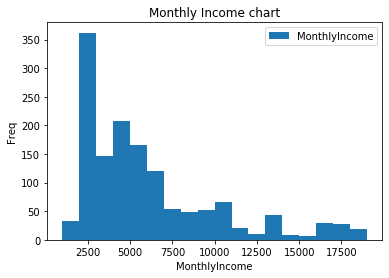

In [36]:
bins_distance = np.arange(start=1000, stop=20000, step=1000)
plt.hist(data['MonthlyIncome'], bins = bins_distance,label=['MonthlyIncome'])
plt.title('Monthly Income chart')
plt.xlabel("MonthlyIncome")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

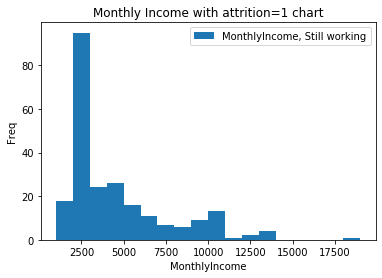

In [37]:
data_f3_attrition1=data[data['Attrition']=='Yes']['MonthlyIncome']
bins_distance = np.arange(start=1000, stop=20000, step=1000)
plt.hist(data_f3_attrition1, bins = bins_distance, label=['MonthlyIncome, Still working'])
plt.title('Monthly Income with attrition=1 chart')
plt.xlabel("MonthlyIncome")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

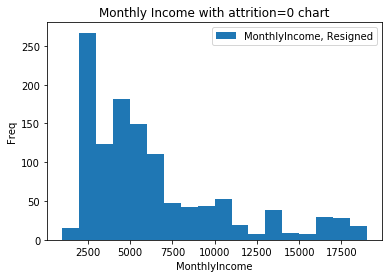

In [38]:
data_f3_attrition0=data[data['Attrition']=='No']['MonthlyIncome']
bins_distance = np.arange(start=1000, stop=20000, step=1000)
plt.hist(data_f3_attrition0, bins = bins_distance, label=['MonthlyIncome, Resigned'])
plt.title('Monthly Income with attrition=0 chart')
plt.xlabel("MonthlyIncome")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

# Hypothesis : The monthly income will impact the attrition rate.

<p><strong>H0</strong> : The monthly income don't impact the attrition rate </p>
<strong>H1</strong> : The monthly income impact the attrition rate.


In [39]:
stats.ttest_1samp(data_f3_attrition1, data['MonthlyIncome'].mean())

Ttest_1sampResult(statistic=-7.256448049585389, pvalue=5.693274853957249e-12)

In [40]:
print("T-critical value:", stats.t.ppf(1-(0.05/2), len(data_f3_attrition1)-1))

T-critical value: 1.970066853101121


<B>We can see T-statistic > T-critical (2.4035749150305388 > 1.96189139030643). So we reject H0. The Monthly Income will impact the attrition rate. T-stattic is positive. So the higher employees have attrition rate, the higher salary they are paid.

# 3.4. Education :

In [41]:
data['Education'].head()

0    2
1    1
2    2
3    4
4    1
Name: Education, dtype: int64

In [42]:
data['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [43]:
data['Education'].describe()

count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

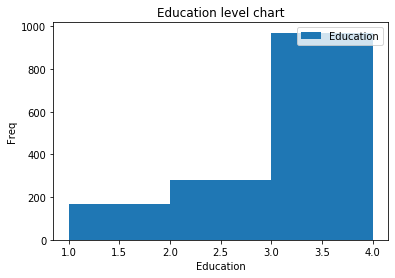

In [44]:
bins_distance = np.arange(start=1, stop=5, step=1)
plt.hist(data['Education'], bins = bins_distance,label=['Education'])
plt.title('Education level chart')
plt.xlabel("Education")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

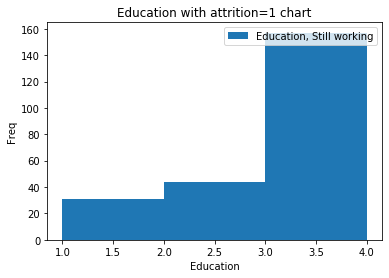

In [45]:
data_f4_attrition1=data[data['Attrition']=='Yes']['Education']
bins_distance = np.arange(start=1, stop=5, step=1)
plt.hist(data_f4_attrition1, bins = bins_distance, label=['Education, Still working'])
plt.title('Education with attrition=1 chart')
plt.xlabel("Education")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

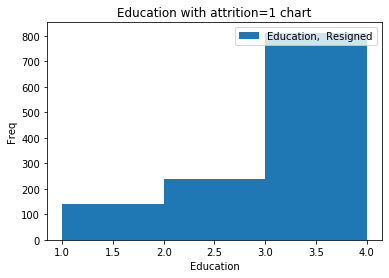

In [46]:
data_f4_attrition0=data[data['Attrition']=='No']['Education']
bins_distance = np.arange(start=1, stop=5, step=1)
plt.hist(data_f4_attrition0, bins = bins_distance, label=['Education,  Resigned'])
plt.title('Education with attrition=1 chart')
plt.xlabel("Education")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

# Hypothesis : The Education won't impact the attrition rate.

<p><strong>H0</strong> : The education don't impact the attrition rate </p>
<strong>H1</strong> : The education impact the attrition rate.

In [47]:
stats.ttest_1samp(data_f4_attrition1, data['Education'].mean())

Ttest_1sampResult(statistic=-1.1186432672619724, pvalue=0.2644296867320878)

In [48]:
print("T-critical value:", stats.t.ppf(1-(0.05/2), len(data_f4_attrition1)-1))

T-critical value: 1.970066853101121


<B>We can see |T-statistic| < |T-critical| (1.1186432672619724 < 1.970066853101121). So we can not reject H0. The Education don't impact the attrition rate.

# 3.5. Number companies worked :

In [49]:
data['NumCompaniesWorked'].head()

0    8
1    1
2    6
3    1
4    9
Name: NumCompaniesWorked, dtype: int64

In [50]:
data['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [51]:
data['NumCompaniesWorked'].describe()

count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

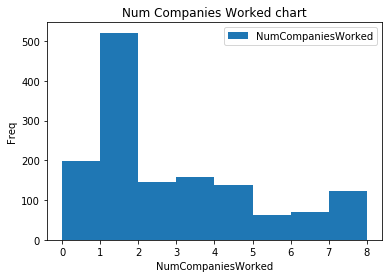

In [52]:
bins_distance = np.arange(start=0, stop=9, step=1)
plt.hist(data['NumCompaniesWorked'], bins = bins_distance,label=['NumCompaniesWorked'])
plt.title('Num Companies Worked chart')
plt.xlabel("NumCompaniesWorked")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

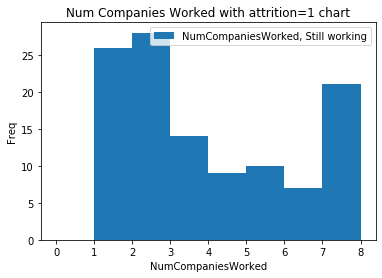

In [53]:
data_f5_attrition1=data[data['Attrition']=='Yes']['NumCompaniesWorked']
bins_distance = np.arange(start=0, stop=9, step=1)
plt.hist(data_f1_attrition1, bins = bins_distance, label=['NumCompaniesWorked, Still working'])
plt.title('Num Companies Worked with attrition=1 chart')
plt.xlabel("NumCompaniesWorked")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

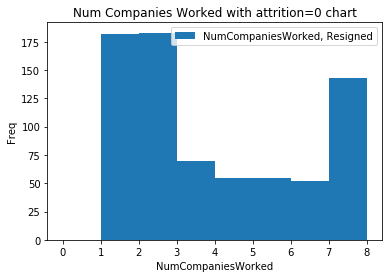

In [54]:
data_f5_attrition0=data[data['Attrition']=='No']['NumCompaniesWorked']
bins_distance = np.arange(start=0, stop=9, step=1)
plt.hist(data_f1_attrition0, bins = bins_distance, label=['NumCompaniesWorked, Resigned'])
plt.title('Num Companies Worked with attrition=0 chart')
plt.xlabel("NumCompaniesWorked")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.show

# Hypothesis : The Num Companies Worked will impact the attrition rate.

<p><strong>H0</strong> : The Num Companies Worked don't impact the attrition rate </p>
<strong>H1</strong> : The Num Companies Worked impact the attrition rate.

In [55]:
stats.ttest_1samp(data_f5_attrition1, data['NumCompaniesWorked'].mean())

Ttest_1sampResult(statistic=1.4238356021660938, pvalue=0.1558148481629175)

In [56]:
print("T-critical value:", stats.t.ppf(1-(0.05/2), len(data_f5_attrition1)-1))

T-critical value: 1.970066853101121


<B>We can see T-statistic < T-critical (1.4238356021660938 < 1.970066853101121). So we can't reject H0. The Num Companies Worked don't impact the attrition rate.

# Conclution : The key factors which are playing into the current attrition rate are DistanceFromHome, MonthlyIncome, TotalWorkingYears.

# When are employees leaving?

In [64]:
print("Employee will leave when: Distance from home = ",data_f1_attrition1.mean(), "; Total working years = ", data_f2_attrition1.mean(),"; Monthly income = ",data_f3_attrition1.mean())

Employee will leave when: Distance from home =  10.632911392405063 ; Total working years =  8.244725738396625 ; Monthly income =  4787.0928270042195


<h1 style="color:Green;"> The end ^.^</h1>